<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/STP_Module4Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent




In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(1)

In [7]:
X = 3 * np.random.rand(120, 1)
y = 2 + 5 * X + np.random.randn(120, 1)

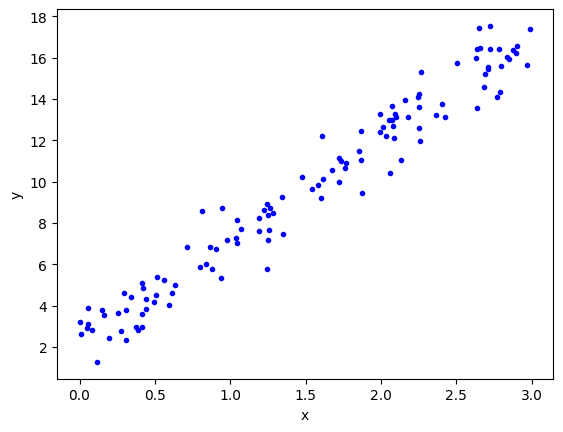

In [8]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Our goal is to use Gradient Descent to find the original parameters (intercept = 4, slope = 3) just by looking at this scattered data.

## The Cost Function for Linear Regression




In [9]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

## The Gradient of the Cost Function




### Variant 1: Batch Gradient Descent




In [10]:
def gradient_descent(X, y, theta, lr=0.005, iterations=1500):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        theta = theta - lr * gradients
        cost_history.append(cal_cost(theta, X, y))

    return theta, cost_history

### Running Batch Gradient Descent

Let's run this for **1000 iterations** with a learning rate of **0.01**. We start with a random guess for our parameters (`y_pred`).

**Our model** is:
$$
y = \theta_0 + \theta_1 x
$$

**A crucial step:**
To handle the intercept term $\theta_0$ using matrix multiplication, we add a "dummy" feature $x_0 = 1$ to all our input samples. This is known as the **bias trick**.


In [11]:
X_b = np.c_[np.ones((len(X), 1)), X]
theta_init = np.random.randn(2,1)

theta_low_lr, cost_low_lr = gradient_descent(
    X_b, y, theta_init, lr=0.005, iterations=1500
)
print(theta_low_lr)

[[1.90659717]
 [5.09715922]]


In [12]:
theta_high_lr, cost_high_lr = gradient_descent(
    X_b, y, np.random.randn(2,1), lr=0.1, iterations=200
)

print(theta_high_lr)

[[2.19232585]
 [4.94732951]]


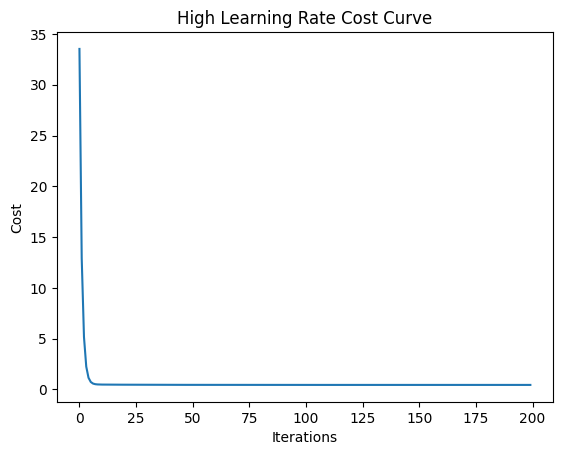

In [13]:
plt.plot(cost_high_lr)
plt.title("High Learning Rate Cost Curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

The smooth curve is characteristic of Batch Gradient Descent.

### Variant 2: Stochastic Gradient Descent (SGD)

**Batch GD** is inefficient for large datasets. **SGD** addresses this by taking a gradient step based on **only one randomly chosen training example at a time**.

**Pros:**
- Extremely fast per step.
- Can help escape shallow local minima due to its random nature.

**Cons:**
- The path to the minimum is very noisy and erratic.
- It never truly "settles" at the minimum but bounces around it.


In [14]:
def stochastic_gradient_descent(X, y, theta, lr=0.05, epochs=40):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - lr * gradient
        cost_history.append(cal_cost(theta, X, y))

    return theta, cost_history

Let's run SGD. Note that it requires a much higher learning rate and fewer epochs (passes over the data) to converge.

In [16]:
theta_sgd, cost_sgd = stochastic_gradient_descent(
    X_b, y, np.random.randn(2,1), lr=0.05, epochs=40
)

print(theta_sgd)

[[2.11729478]
 [4.69835597]]


Again, the parameters are close to the true values, but notice the final error is higher and the parameters are slightly less accurate. This is due to the noisy nature of SGD.


### Visualizing the Loss


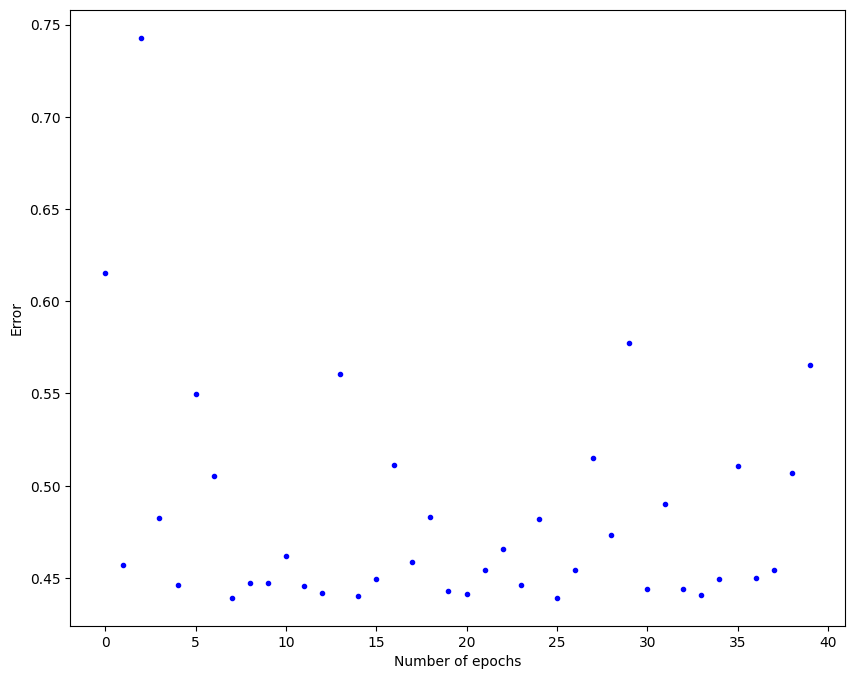

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of epochs')
# y_pred = np.random.randn(2,1) # This line is not necessary for plotting the cost history
ax.plot(range(len(cost_sgd)), cost_sgd, 'b.')
plt.show()

### Variant 3: Mini-Batch Gradient Descent




In [19]:
def mini_batch_gradient_descent(X, y, theta, lr=0.05, epochs=100, batch_size=10):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]
            gradient = (1/len(X_i)) * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - lr * gradient

        cost_history.append(cal_cost(theta, X, y))

    return theta, cost_history

Let's run it.

In [20]:
theta_mini_large, cost_mini_large = mini_batch_gradient_descent(
    X_b, y, np.random.randn(2,1), lr=0.05, epochs=100, batch_size=80
)

print(theta_mini_large)

[[2.27580986]
 [4.91303281]]


### Visualizing the Loss

The loss curve is less noisy than SGD but not as smooth as Batch GD.

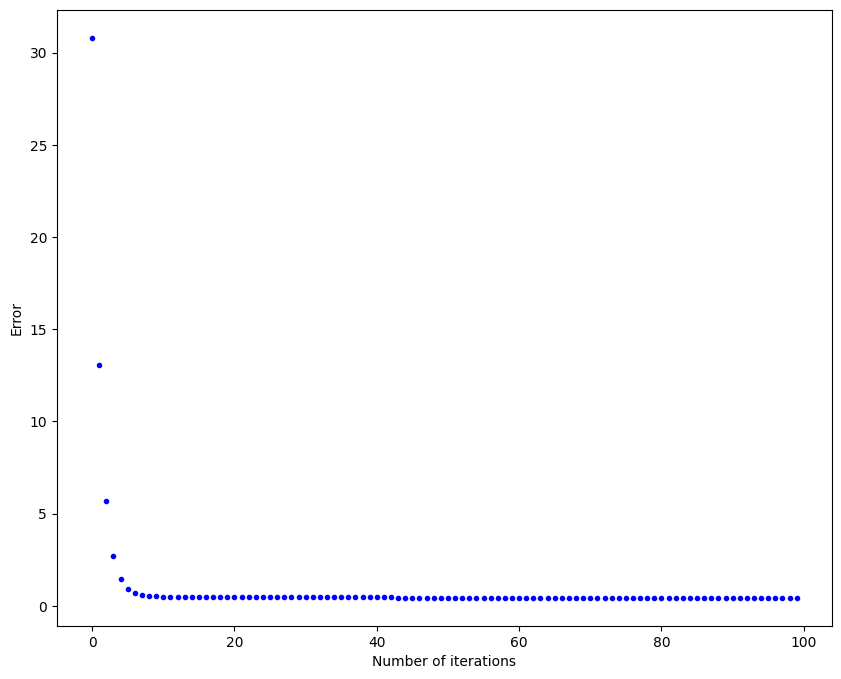

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
# y_pred = np.random.randn(2,1)
ax.plot(range(len(cost_mini_large)), cost_mini_large, 'b.')
plt.show()

### Visual Comparison of the Learned Models

Let's re-run all three algorithms and plot their final learned lines on the original data. This will give us a better intuition for how they perform.

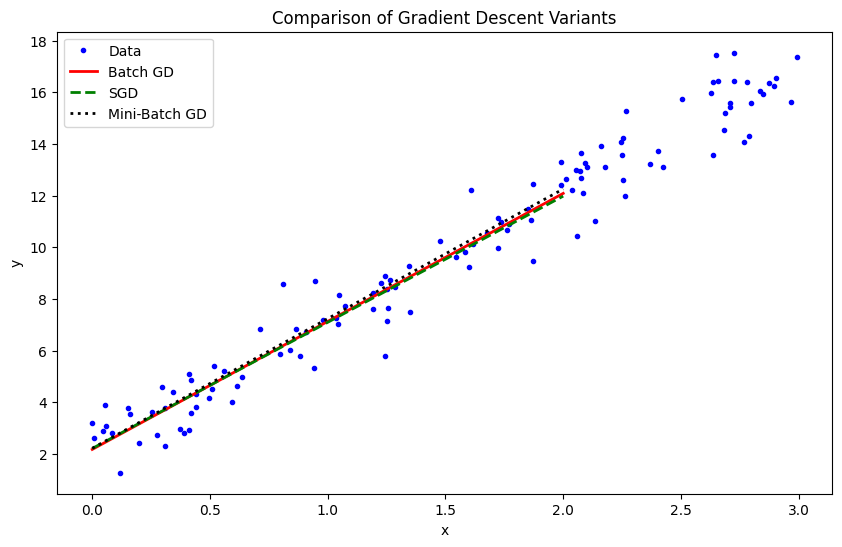

In [24]:
lr_batch = 0.1
n_iter_batch = 200
y_pred_batch_final, _ = gradient_descent(X_b, y, np.random.randn(2,1), lr_batch, n_iter_batch)
lr_sgd = 0.05
n_iter_sgd = 200
y_pred_sgd_final, _ = stochastic_gradient_descent(X_b, y, np.random.randn(2,1), lr_sgd, n_iter_sgd)
lr_mini = 0.1
n_iter_mini = 200
y_pred_mini_final, _ = mini_batch_gradient_descent(X_b, y, np.random.randn(2,1), lr_mini, n_iter_mini)
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data')
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict_batch = X_new_b.dot(y_pred_batch_final)
y_predict_sgd = X_new_b.dot(y_pred_sgd_final)
y_predict_mini = X_new_b.dot(y_pred_mini_final)
plt.plot(X_new, y_predict_batch, 'r-', linewidth=2, label='Batch GD')
plt.plot(X_new, y_predict_sgd, 'g--', linewidth=2, label='SGD')
plt.plot(X_new, y_predict_mini, 'k:', linewidth=2, label='Mini-Batch GD')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.show()

As you can see, all three methods find a very good fit to the data. While their training dynamics (the loss curves) are very different, they all achieve the same goal.

### Things to Try Out

1. **Change batch size in mini-batch gradient descent:**
   Try a small size (e.g., `2`) and a large size (e.g., `80`). How does the loss curve change? What happens when the batch size equals the total number of samples?

2. **Test on real datasets:**
   Use a dataset from `sklearn.datasets`, like the **Boston Housing** or **Diabetes** datasets, and see how each variant performs.

3. **Compare learning rates:**
   Test the effects of changing the learning rate. Try a very high and a very low learning rate for each of the three variants. Which one is most sensitive to the learning rate?

4. **Implement a learning rate schedule for SGD:**
   Instead of a fixed learning rate, make it decrease over time (e.g., `lr = initial_lr / (epoch + 1)`). How does this affect the final error and the stability of the loss curve?


### 1.Small batch (2): Loss curve is noisy and fluctuates.

### Large batch (80): Loss curve is smoother and more stable.

### Batch = total samples: Same as Batch Gradient Descent with a smooth curve.

2.Batch GD: Stable but slow.

SGD: Fast but noisy.

Mini-batch GD: Best balance of speed and stability.

3.Low learning rate: Slow convergence.

High learning rate: May diverge.

Most sensitive: Stochastic Gradient Descent.

4. Learning Rate Schedule (SGD)

Decreasing learning rate reduces oscillations.

Improves stability and lowers final error.

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

### Answer



The correct statement is (iii).

**Explanation:**

* A convex loss function has a single minimum, which is the global minimum (like a perfect bowl).

* Batch Gradient Descent calculates the true gradient of the entire dataset. With a suitable learning rate, it will take determined, non-random steps directly towards the minimum. It is therefore guaranteed to converge to the global optimum of a convex function.

* Stochastic Gradient Descent uses a single random point to estimate the gradient. This estimate is noisy and does not point directly at the minimum. Because of this randomness, SGD will not converge to the exact minimum point but will instead perpetually bounce around in the vicinity of the minimum. To make it converge, one typically has to use a learning rate schedule that slowly decreases the learning rate to zero.

* Statements (i) and (ii) are too strong; they don't specify the type of loss function. For a non-convex function (with many local minima), neither is guaranteed to find the global optimum. They might get stuck in a local minimum.

* **Therefore**, for a convex problem, Batch GD is guaranteed to find the optimum, while standard SGD is not guaranteed to land precisely on it.